In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
import pandas as pd


In [3]:
n=25000
n=4*(n//4)

In [4]:
mu11=5
mu12=12
mu1=[mu11,mu12]
sig11=50
sig12=70
cov1=[[sig11,0],[0,sig12]]
x1 = np.random.multivariate_normal(mu1,cov1,n//4)

mu21=60
mu22=100
mu2=[mu21,mu22]
sig21=30
sig22=15
cov2=[[sig21,0],[0,sig22]]
x2 = np.random.multivariate_normal(mu2,cov2,n//4)

mu31=-30
mu32=50
mu3=[mu31,mu32]
sig31=50
sig32=45
cov3=[[sig31,0],[0,sig32]]
x3 = np.random.multivariate_normal(mu3,cov3,n//4)

mu41=70
mu42=-50
mu4=[mu41,mu42]
sig41=45
sig42=75
cov4=[[sig41,0],[0,sig42]]
x4 = np.random.multivariate_normal(mu4,cov4,n//4)

x_train = np.concatenate((x1,x2,x3,x4))

y_train = np.concatenate((np.zeros(int(n//4)), np.zeros(n//4),np.ones(int(n//4)),np.ones(n//4))).reshape(-1, 1).astype(int)
print(x_train)
print(y_train)

[[  3.07952159   5.47171189]
 [  3.99455531   7.99184748]
 [ -5.22173171  12.28721646]
 ...
 [ 75.67907429 -47.0061262 ]
 [ 67.47232982 -37.63761515]
 [ 70.81436891 -60.80812115]]
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_train


array([[-0.56094654, -0.40616681],
       [-0.53877714, -0.36060244],
       [-0.7620689 , -0.28294162],
       ...,
       [ 1.19799196, -1.35497274],
       [ 0.99915935, -1.18558888],
       [ 1.08013011, -1.60451456]])

# Bloom Filter

In [6]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(self.model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

    def add_init(self,x_train,y_train):
        pred = self.model.predict_proba(x_train)
        pred=pred[:,1]
        pred=pred.reshape(-1,1)
        for i in range(len(pred)):
            if(y_train[i]==1):
                result = math.floor(pred[i][0]*(self.size-1))
                self.bit_array[result] = 1
    
    def predict(self,x):
        initpred = self.model.predict_proba(x)
        initpred=initpred[:,1]
        initpred=initpred.reshape(-1,1)
        indexes = []
        for i in range(len(initpred)):
            indexes += [math.floor(initpred[i][0]*(bf.size-1))]
        pred = []
        for i in indexes:
            pred += [self.bit_array[i]]
        return np.array(pred)

#(Input:bloom filter,number array,ratio; Output:(-1) for false negative, otherwise fpr)
def fpr_kraska_hash(bf,x,y):
    pred = bf.predict(x)
    pred=pred.reshape(-1,1)
    tn, fp, fn, tp = confusion_matrix(y, pred,labels=[False,True]).ravel() 
    return fp/(fp+tn)

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k


def fpr_test(x,bf,y):
    pred=bf.predict(x)
    fp=0
    tn=0
    for i in range(len(pred)):
        if((pred[i]==1)and(y[i]==0)):
            fp+=1
        if((pred[i]==0) and (y[i]==0)):
            tn+=1
        if((pred[i]==0) and (y[i]==1)):
            return -1
    print(fp)
    print(tn)
    return fp/(fp+tn)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

# Logistic Regression Model

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=10.0,random_state = 10,max_iter=100)
classifier.fit(x_train, y_train)

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = classifier.predict(x_train)
print(y_pred)

[1 1 1 ... 1 1 1]


In [9]:
prob=classifier.predict_proba(x_train)
print(prob[:,1])

[0.71365328 0.6921841  0.70887647 ... 0.70826034 0.68550635 0.80949383]


In [10]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_train, y_pred))

Accuracy :  0.71108


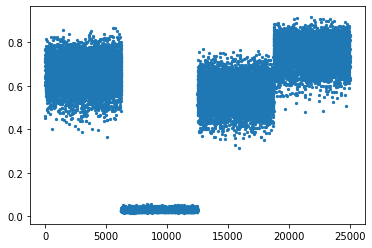

In [11]:
preds =prob[:,1]
plt.scatter(np.arange(len(preds)), preds, s=5)

In [16]:
m=100

In [17]:
bf=BloomFilter(m,classifier)

In [18]:
bf.add_init(x_train,y_train)

In [19]:
print(fpr_test(x_train,bf,y_train))

6250
6250
0.5


In [20]:
import pickle
import os

In [21]:
filename1='logreg_iris.sav'
pickle.dump(classifier,open(filename1,'wb'))

In [22]:
model_size1=os.stat('logreg_iris.sav').st_size

In [23]:
print(model_size1)

840


# SVM Model

In [24]:
from sklearn import svm
from sklearn.metrics import accuracy_score 


In [25]:
clf2 = svm.SVC(kernel='rbf',probability=True)
clf2.fit(x_train, y_train)

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [26]:
predic=clf2.predict(x_train)

In [27]:
probability=clf2.predict_proba(x_train)
print(probability[:,1])
print(probability.shape)

[1.00000010e-07 1.00000010e-07 1.12279554e-06 ... 9.99999999e-01
 9.99999977e-01 9.99999999e-01]
(25000, 2)


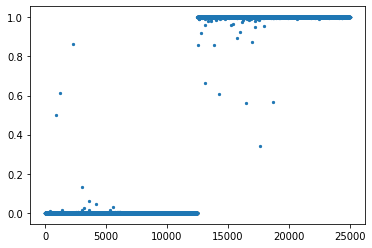

In [28]:
prob=probability[:,1]
plt.scatter(np.arange(len(prob)), prob, s=5)

In [29]:
accuracy = accuracy_score(y_train.flatten(),predic)
print(accuracy)

0.99988


In [30]:
m=25
bf=BloomFilter(m,clf2)
bf.add_init(x_train,y_train)

In [31]:
print(fpr_test(x_train,bf,y_train))

2
12498
0.00016


In [32]:
preds

array([0.71365328, 0.6921841 , 0.70887647, ..., 0.70826034, 0.68550635,
       0.80949383])

In [33]:
filename2='svm_iris.sav'
pickle.dump(clf2,open(filename2,'wb'))

In [34]:
model_size2=os.stat('svm_iris.sav').st_size

In [35]:
print(model_size2)

4262
